In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats

sns.set_style("whitegrid")

In [2]:
df = pd.read_csv("C:/Users/Malcolm/Documents/MedicalExpenditure/data/meps_data_2019_cleaned.csv")

In [3]:
df.head()

,id,age,race,ethnicity,sex,other_language_spoken_at_home,english_fleuncy,born_in_usa,years_in_usa,marriage_status,...,num_discharges,prescription_amount,num_dental_visits,num_home_health_visits,total_income,employment_status,insurance_status,highest_education,full_time_student,total_expenditure
0,2320002101,32.0,3.0,2.0,1.0,2.0,-1.0,1.0,-1.0,5.0,...,0.0,0.0,0.0,0.0,40000.0,1.0,1.0,3.0,-1.0,0.0
1,2320002102,42.0,3.0,2.0,2.0,2.0,-1.0,1.0,-1.0,1.0,...,0.0,0.0,0.0,0.0,40000.0,1.0,1.0,3.0,-1.0,54.0
2,2320002103,16.0,3.0,2.0,2.0,2.0,-1.0,1.0,-1.0,5.0,...,1.0,0.0,0.0,0.0,0.0,-1.0,1.0,8.0,-1.0,7827.0
3,2320005101,72.0,2.0,2.0,2.0,1.0,1.0,1.0,-1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,4.0,4.0,3.0,-1.0,615.0
4,2320005102,83.0,2.0,2.0,1.0,1.0,1.0,1.0,-1.0,1.0,...,0.0,12.0,0.0,0.0,0.0,4.0,4.0,3.0,-1.0,2452.0


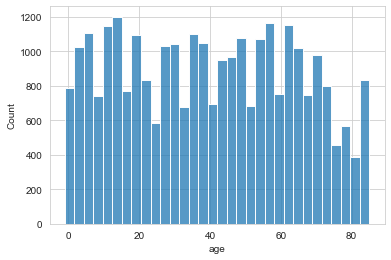

In [4]:
sns.histplot(data=df, x="age")
plt.show()

Pretty even distributions of ages! Let's examine the other demogrphics

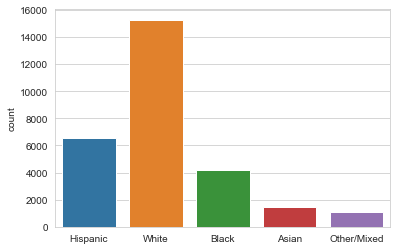

In [5]:
fig = sns.countplot(data=df, x="race")
fig.set_xticklabels(['Hispanic','White','Black','Asian', 'Other/Mixed'])
fig.set(xlabel=None)
plt.show()

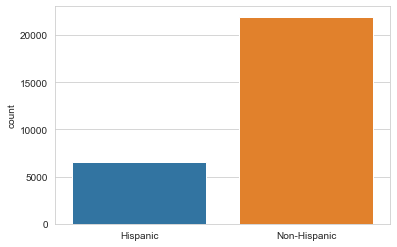

In [6]:
fig = sns.countplot(data=df, x="ethnicity")
fig.set_xticklabels(['Hispanic','Non-Hispanic'])
fig.set(xlabel=None)
plt.show()

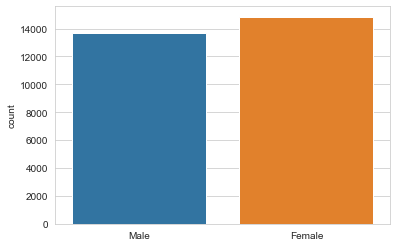

In [7]:
fig = sns.countplot(data=df, x="sex")
fig.set_xticklabels(['Male','Female'])
fig.set(xlabel=None)
plt.show()

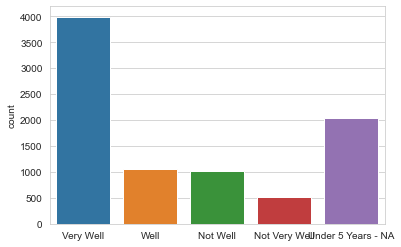

In [8]:
# remove na values (numbers lower than 0)
df2 = df[df['english_fleuncy'] >= 0]
fig = sns.countplot(data=df2, x='english_fleuncy')
fig.set(xlabel=None)
fig.set_xticklabels(['Very Well','Well','Not Well','Not Very Well','Under 5 Years - NA'])
sns.set(rc = {'figure.figsize':(15,10)})
plt.show()

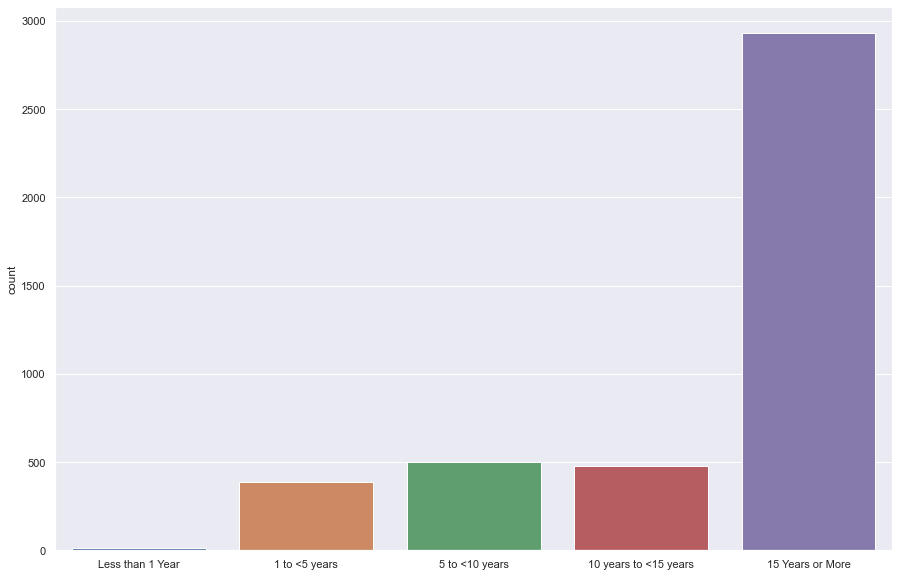

In [9]:
df3 = df[df['years_in_usa'] >= 0]
fig = sns.countplot(data=df3, x='years_in_usa')
fig.set(xlabel=None)
fig.set_xticklabels(['Less than 1 Year','1 to <5 years','5 to <10 years','10 years to <15 years','15 Years or More'])
plt.show()

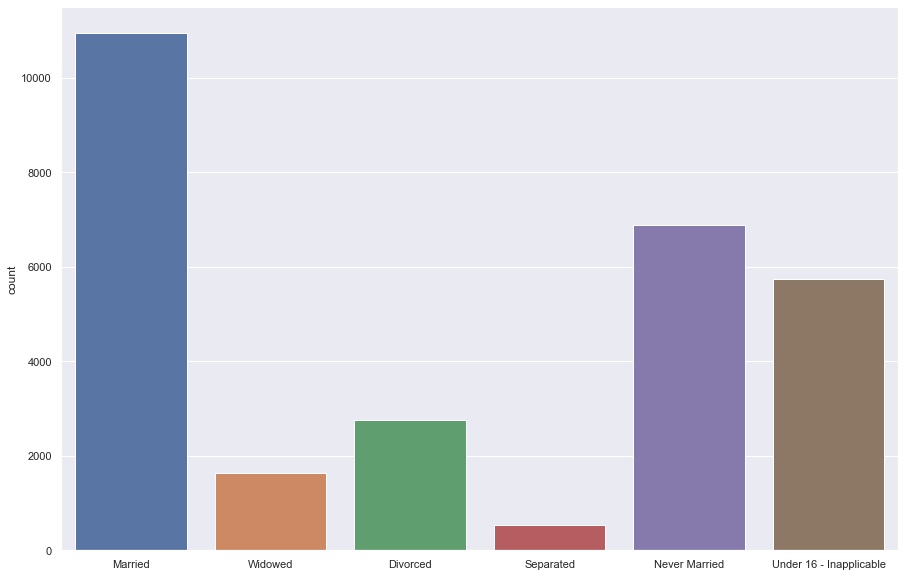

In [10]:
df4 = df[df['marriage_status'] >= 0]
fig = sns.countplot(data=df4, x='marriage_status')
fig.set_xticklabels(['Married','Widowed','Divorced','Separated','Never Married','Under 16 - Inapplicable'])
fig.set(xlabel=None)
plt.show()

Let's take a look at all the diagnosis variables and see what kind of health conditions the survey populations have.

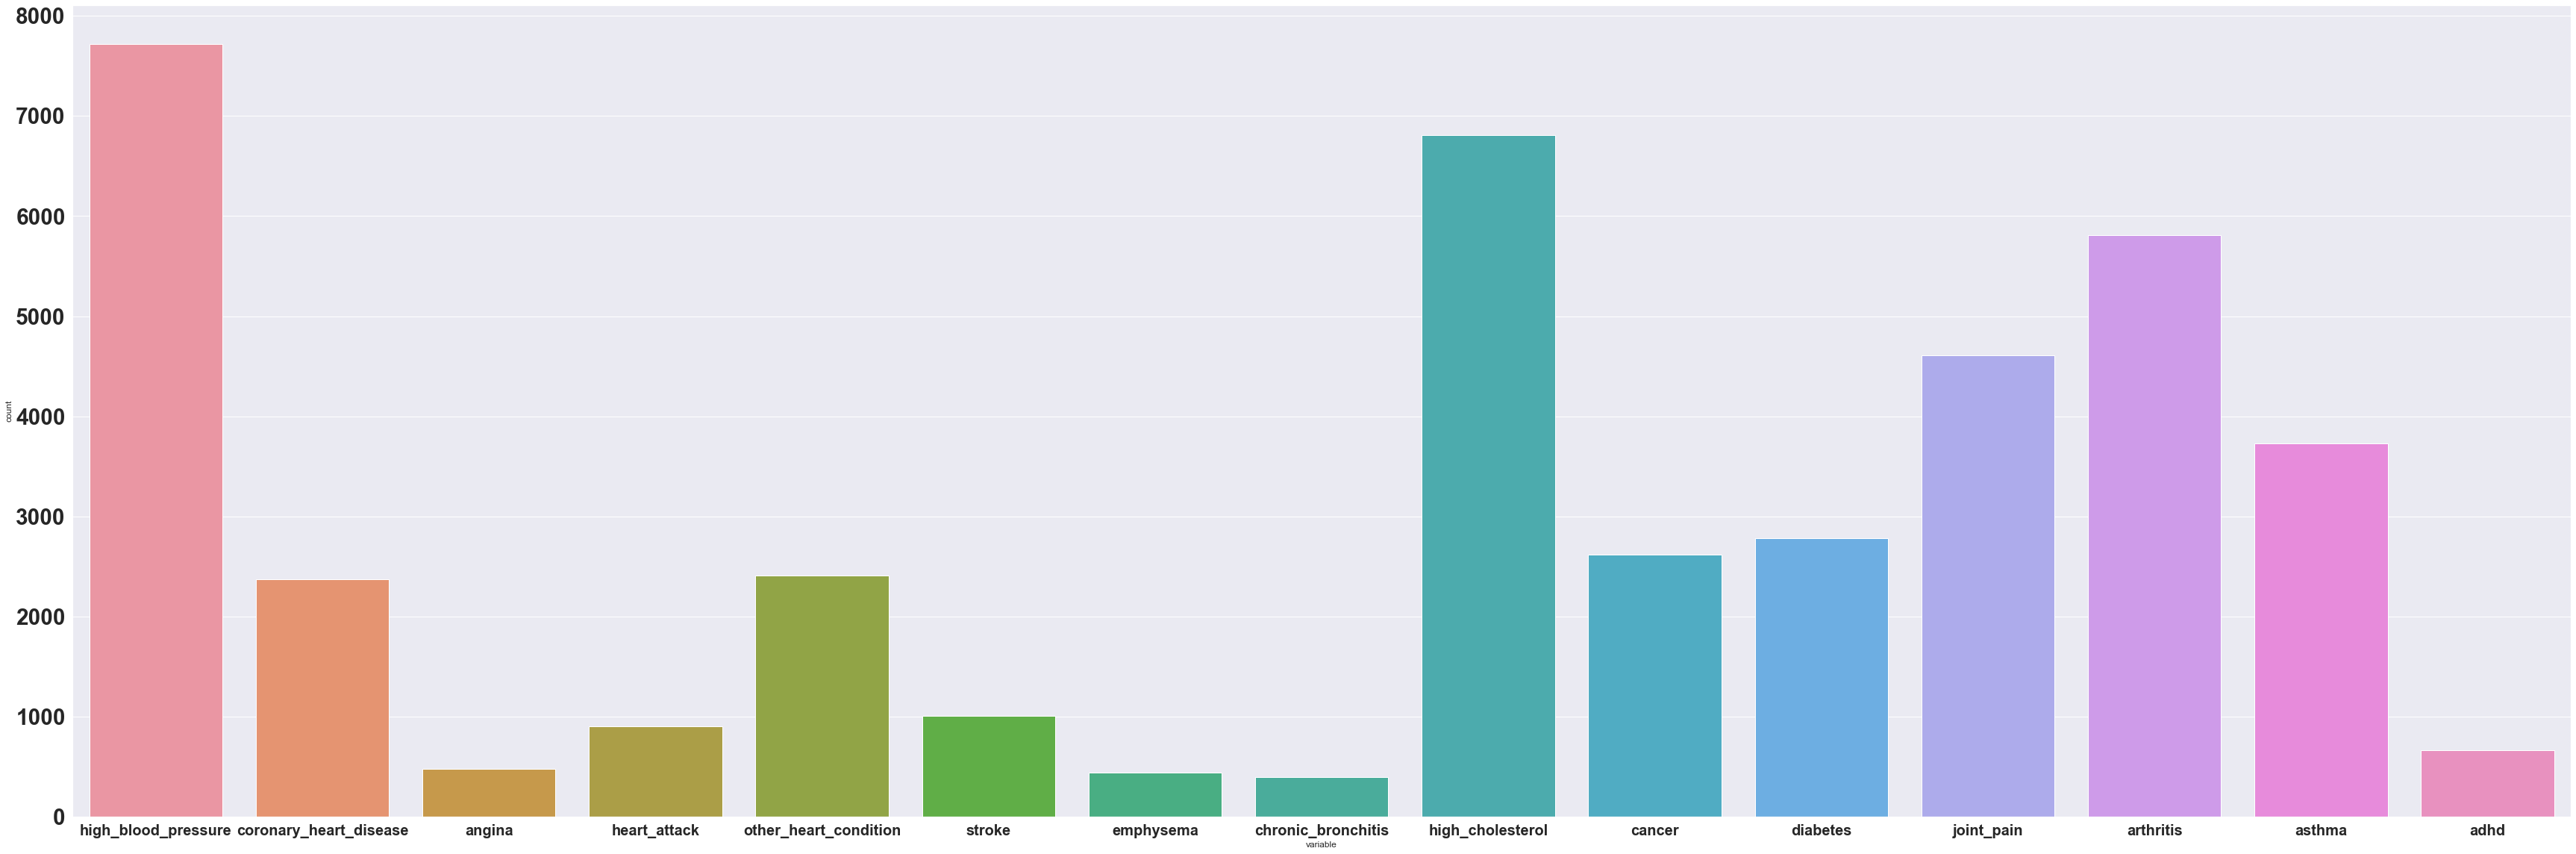

In [11]:
diag = ['high_blood_pressure', 'coronary_heart_disease', 'coronary_heart_disease', 'angina','heart_attack','other_heart_condition', 'stroke','emphysema','chronic_bronchitis','high_cholesterol', 'cancer','diabetes','joint_pain','arthritis','asthma','adhd']
plt.figure(figsize = (60, 20))
df_diag = df.melt(value_vars=df[diag].columns)
df_diag = df_diag[df_diag['value'] == 1]
plt.xticks(fontsize = 20, fontweight='bold')
plt.yticks(fontsize = 30, fontweight='bold')
sns.countplot(data = df_diag, x='variable')
plt.show()

The most prevalent health conditions in our sample are high blood pressure, high cholesterol, and athritis which squares with contemporary understanding of prevalent medical conditions.

Let's take a look at the distribution of total income and try to identify any outliers

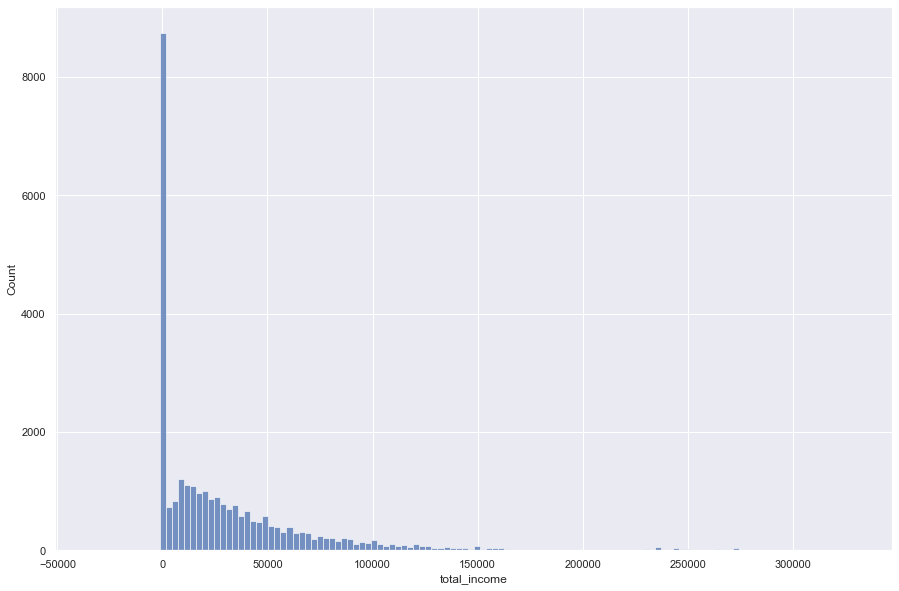

In [12]:
sns.histplot(data=df['total_income'])
plt.show()

It appears that an extremely significant amount of the participants in this survey have zero income. I think it'd be helpful to remove the incomes <= 0 to get a sense of the distribution of income-earning individuals

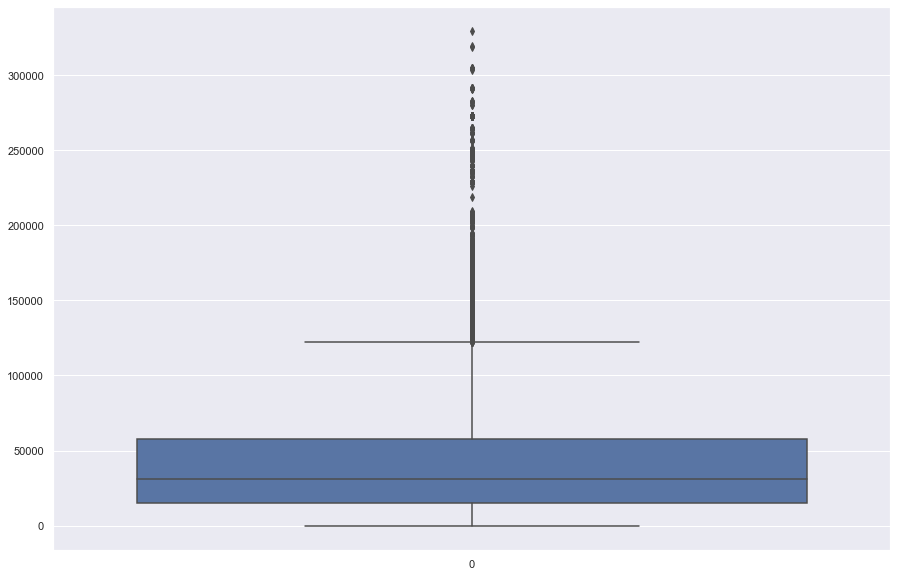

31017.5


In [13]:
df_inc = df[df['total_income'] > 0]
sns.boxplot(data=df_inc['total_income'])
plt.show()
print(df_inc['total_income'].median())

This isn't too far off from the median income for 2019 pulled from Wikipedia.

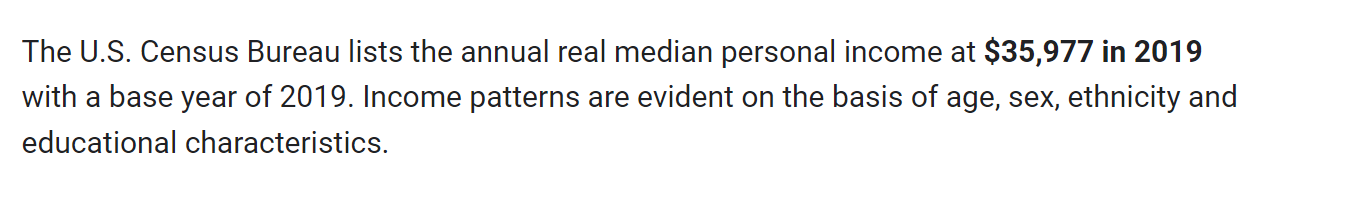

It being slightly less may be due the populations this survey pulled from. Another thing to note is the large amount of outliers above the end of the boxplot.

Let's examine the distribution of visit numbers and create a feature to count for the amount of visits in total each subject has.

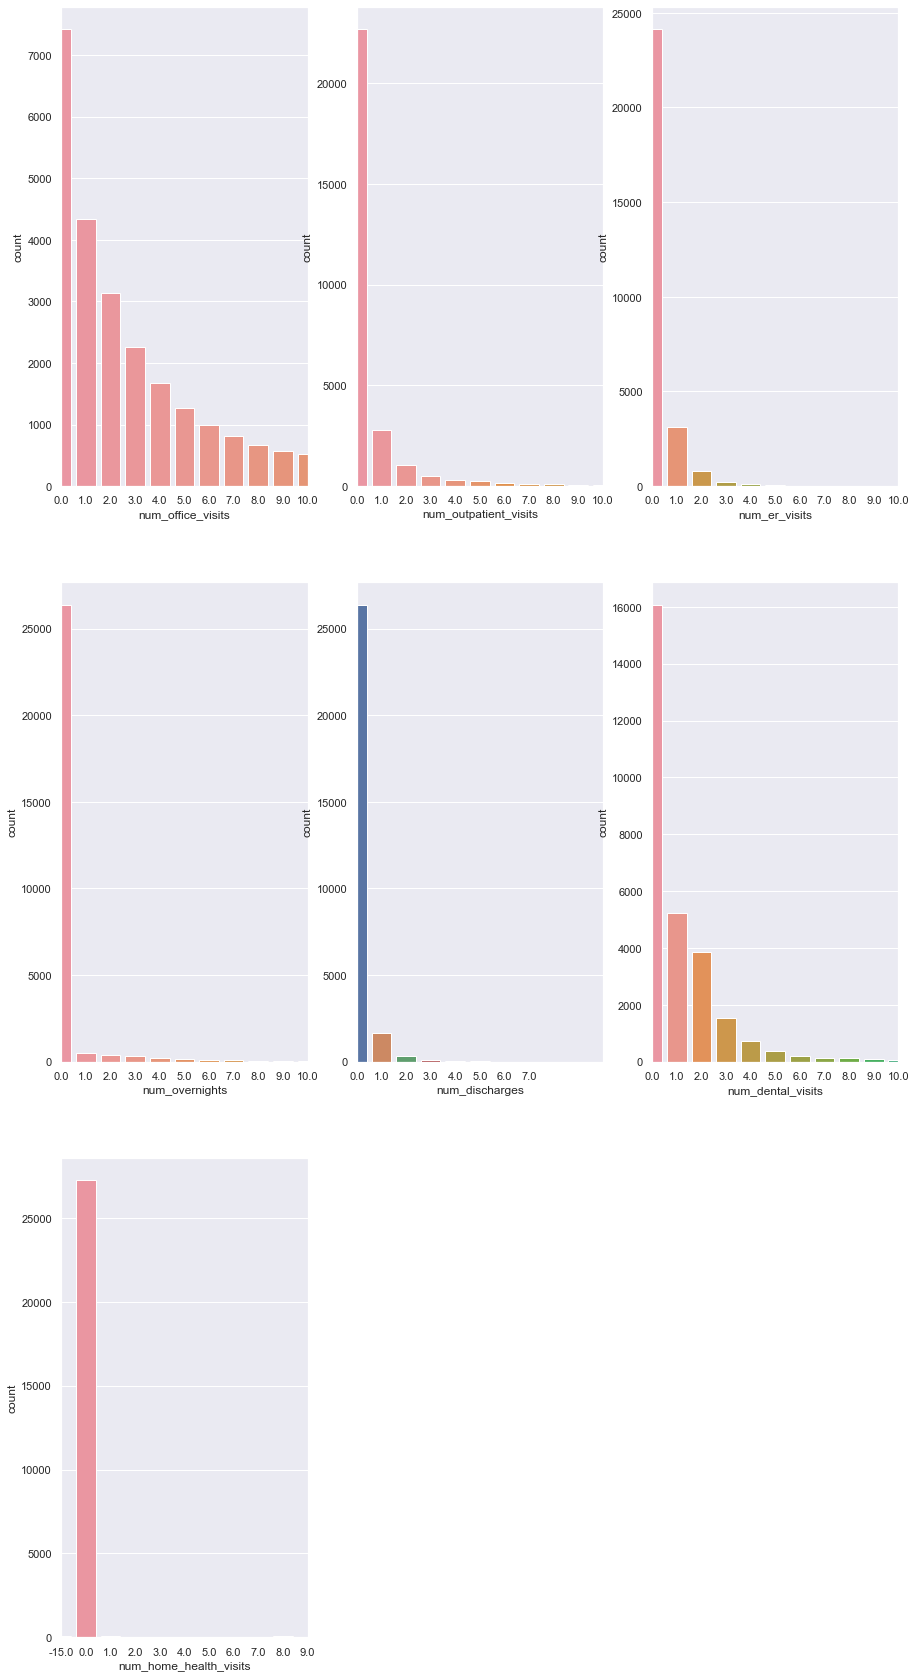

In [14]:
vis_num_features = ['num_office_visits','num_outpatient_visits','num_er_visits','num_overnights','num_discharges','num_dental_visits','num_home_health_visits']

plt.figure(figsize = (15, 30))
for i in enumerate(vis_num_features):
    plt.subplot(3, 3,i[0]+1)
    sns.countplot(data = df, x=i[1])
    plt.xlim(0, 10)

A majority of the subjects have had zero health-related visits this year so it may be more fruitful to look only at subjects with more than one. 

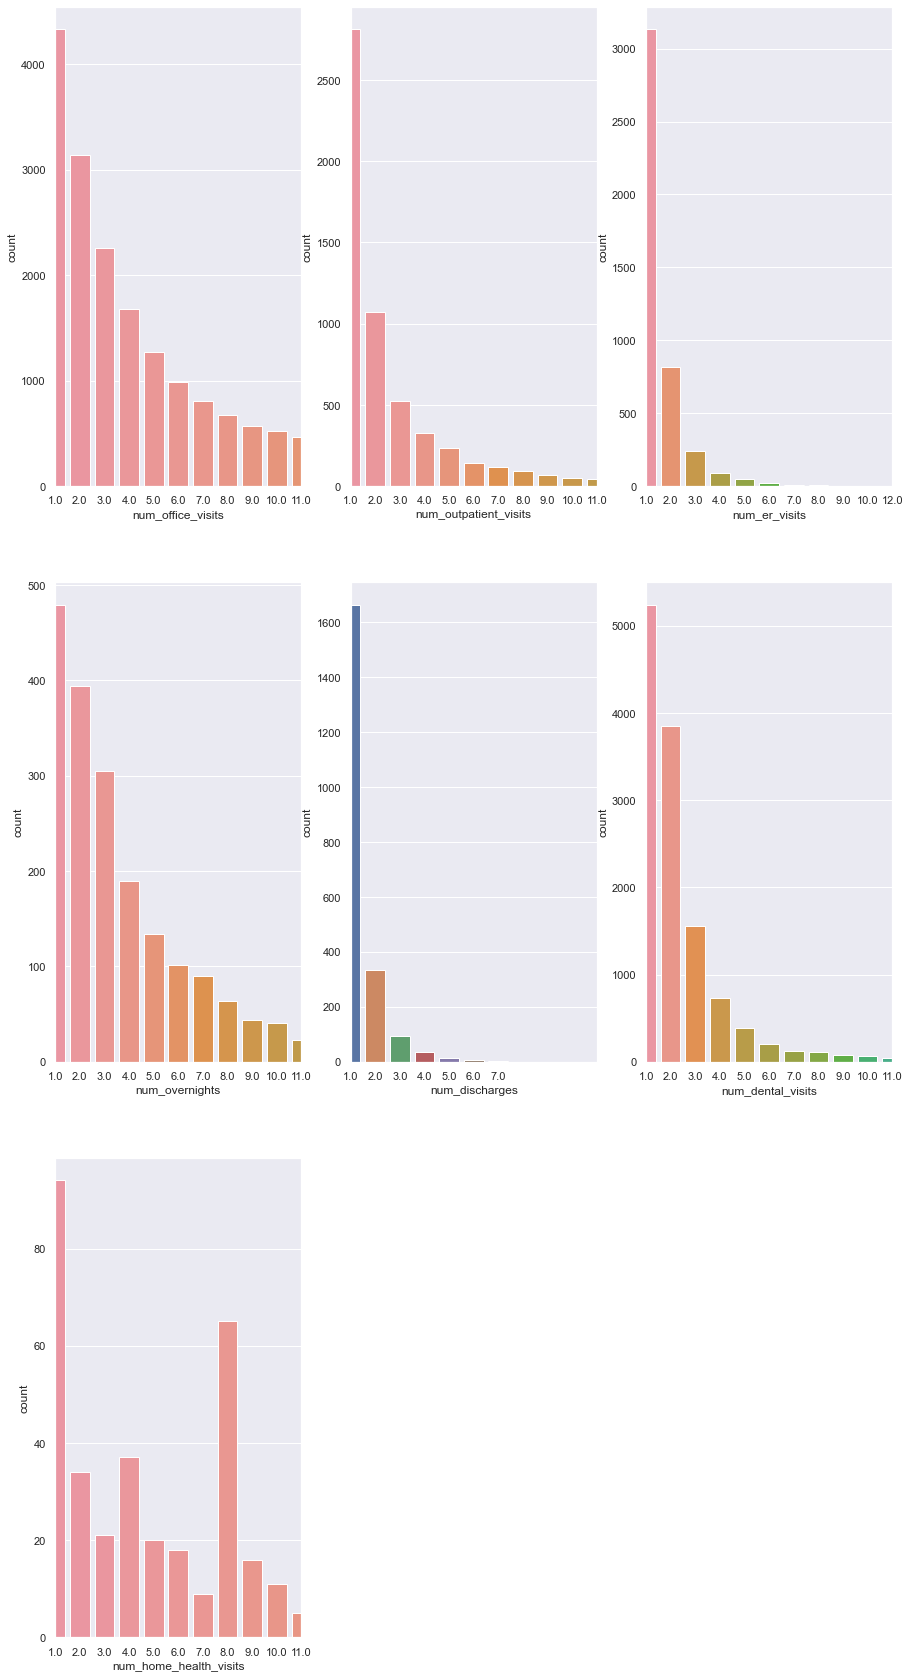

In [15]:
plt.figure(figsize = (15, 30))
for i in enumerate(vis_num_features):
    plt.subplot(3, 3,i[0]+1)
    df2 = df[df[i[1]] > 0] 
    sns.countplot(data = df2, x=i[1])
    plt.xlim(0, 10)

All of these are skewed to the right as expected. The only real difference is the number of home visits which I suspect is probably due to the number of older patients in the dataset. Let's confirm that.

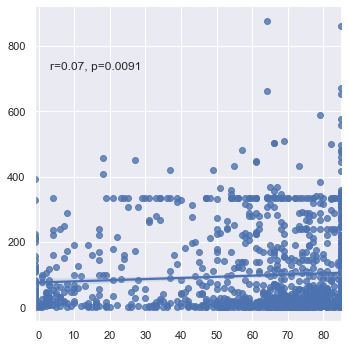

In [16]:
df_homevisits = df[df["num_home_health_visits"] > 0] 

def annotate(data, **kws):
    """Adds pearson r and p value"""
    r, p = stats.pearsonr(df_homevisits['age'], df_homevisits['num_home_health_visits'])
    ax = plt.gca()
    ax.text(.05, .8, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=ax.transAxes)
    
g = sns.lmplot(x="age", y="num_home_health_visits", data=df_homevisits) 
g.map_dataframe(annotate)
plt.show()

There isn't as much of a correlation as I expected. Let's check the correlation with all the variables and included and see if we can find.

In [17]:
df_corr = df.corr()
print(df_corr['num_home_health_visits'].sort_values(ascending=False))

num_home_health_visits           1.000000
cannot_lift_10_lbs               0.317327
cannot_reach_over_head           0.316998
cannot_walk_10_steps             0.314487
cannot_bend                      0.305155
cannot_stand_for_20_min          0.299256
cannot_walk_3_blocks             0.296079
cannot_walk_a_mile               0.286310
cannot_use_fingers               0.285586
total_expenditure                0.245828
prescription_amount              0.219341
insurance_status                 0.149402
num_discharges                   0.130277
employment_status                0.124449
num_er_visits                    0.116337
age                              0.113423
num_overnights                   0.107610
num_office_visits                0.102108
military_status                  0.077379
feet_checked                     0.045445
chronic_bronchitis               0.044747
num_outpatient_visits            0.040217
emphysema                        0.036037
angina                           0

It looks like the greatest correlation with home visits are difficulties with lifting, walking, etc which makes sense. Individuals with physical disabilities are more in need of at-home visits. Let's view a heatmap of these restrictions and home health visits.

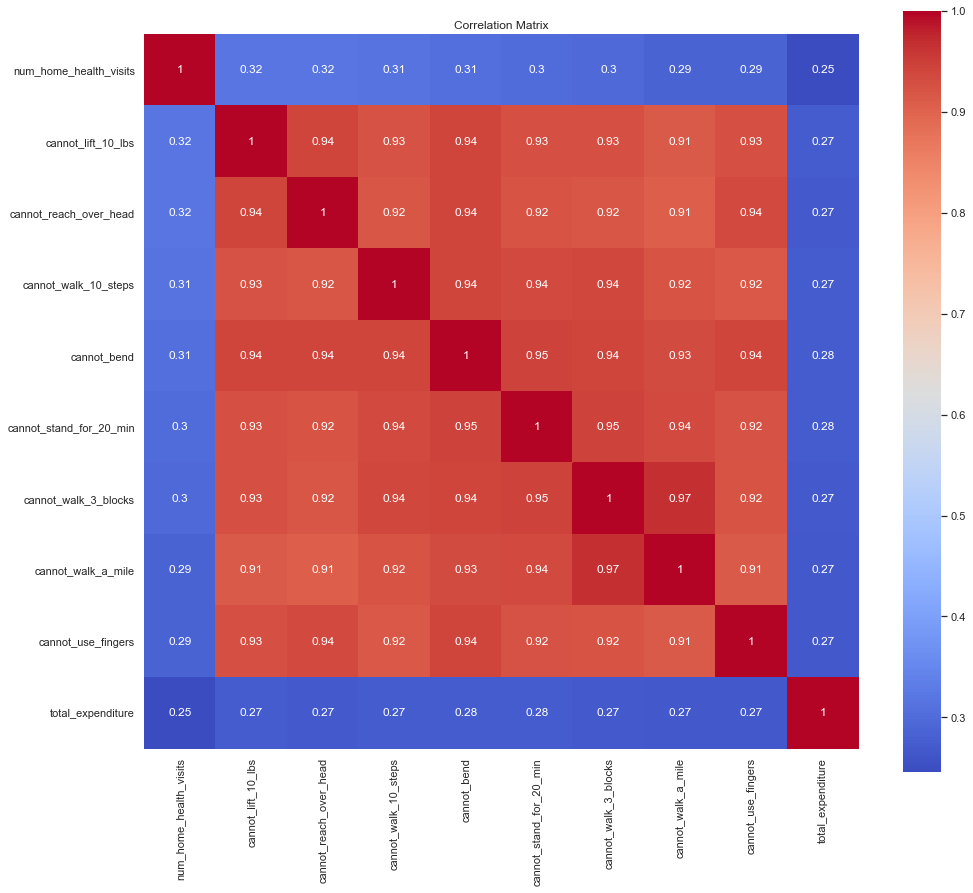

In [18]:
features = ["num_home_health_visits","cannot_lift_10_lbs","cannot_reach_over_head","cannot_walk_10_steps","cannot_bend","cannot_stand_for_20_min", "cannot_walk_3_blocks","cannot_walk_a_mile","cannot_use_fingers", "total_expenditure"]

df_dis = df[features]
plt.figure(figsize=(16,14))
hmp = sns.heatmap(df_dis.corr(method='pearson'), square= True, annot=True, cmap='coolwarm')
hmp.set_title('Correlation Matrix')
plt.show()

Very strong correlation with all the physical limitations. However if we examine closer, it seems like most subjects have these categories as -1 or "Inapplicable." 

In [19]:
df["cannot_lift_10_lbs"].value_counts()

-1.0    25174
 1.0     1302
 2.0     1193
 3.0      497
 4.0      338
-8.0        7
-7.0        1
Name: cannot_lift_10_lbs, dtype: int64

These must be only collected if the participants are noted to have a physical limitation so it makes sense that these are strongly correlated with each other.

Let's start taking a look at how certain features interact with total expenditure. Let's start with total income vs total expenditure.

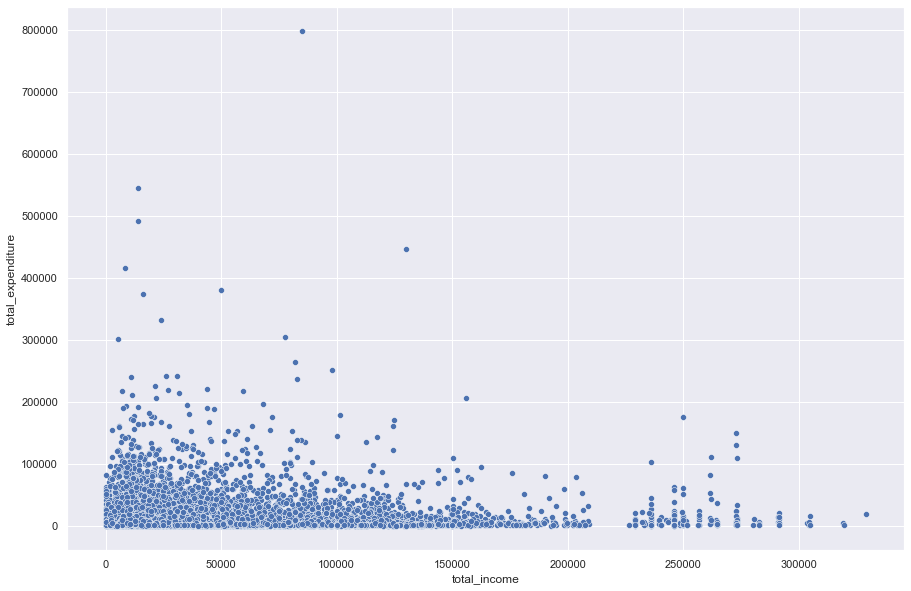

In [20]:
df2 = df[df["total_income"] > 0] 
df2 = df2[df2["total_expenditure"] > 0]

sns.scatterplot(x="total_income", y="total_expenditure", data=df2)
plt.show()

Let's see the effect that our demographics have on the median expenditure and income.

In [21]:
df_race_median =df.groupby(['race', 'sex']).agg(median_income=("total_income",'median'),median_expenditure=("total_expenditure",'median'))
df_race_median = df_race_median.reset_index()
df_race_median.head()

,race,sex,median_income,median_expenditure
0,1.0,1.0,10000.0,331.0
1,1.0,2.0,5777.0,591.0
2,2.0,1.0,30089.0,1671.0
3,2.0,2.0,21631.5,2684.5
4,3.0,1.0,11480.5,520.0


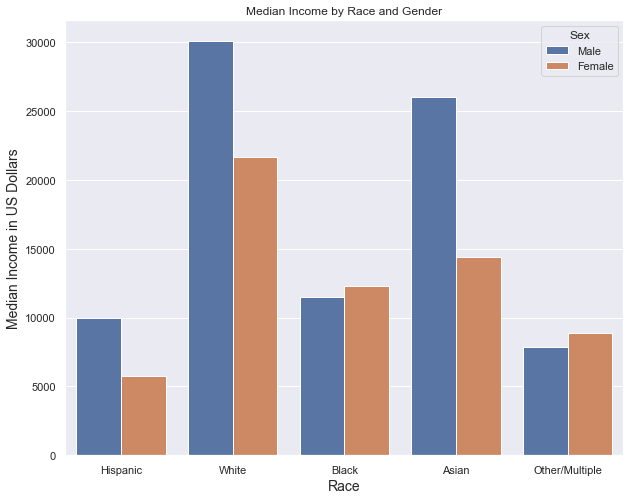

In [22]:
plt.figure(figsize=(10, 8))
fig = sns.barplot(x='race', 
    y='median_income',
    data=df_race_median,
    hue='sex',
    ci=None )
plt.ylabel("Median Income in US Dollars", size=14)
plt.xlabel("Race", size=14)
plt.legend(title='Sex', labels=['Male', 'Female'])
plt.title(label = "Median Income by Race and Gender")
fig.set_xticklabels(labels = ["Hispanic", "White", "Black","Asian", "Other/Multiple"])
plt.show()

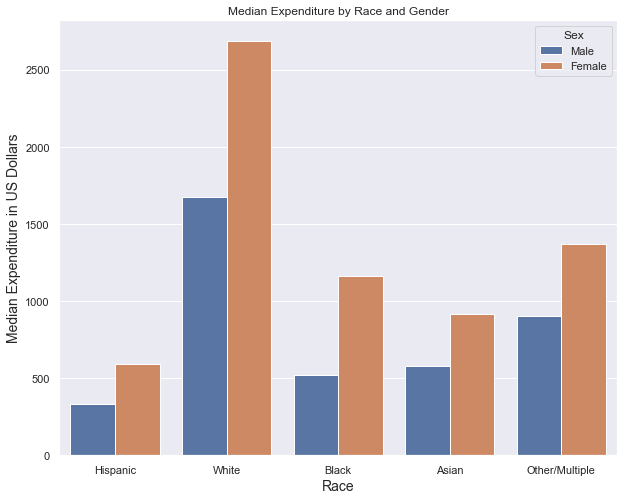

In [23]:
plt.figure(figsize=(10, 8))
fig = sns.barplot(x='race', 
    y='median_expenditure',
    data=df_race_median,
    hue='sex',
    ci=None )
plt.ylabel("Median Expenditure in US Dollars", size=14)
plt.xlabel("Race", size=14)
plt.legend(title='Sex', labels=['Male', 'Female'])
plt.title(label = "Median Expenditure by Race and Gender")
fig.set_xticklabels(labels = ["Hispanic", "White", "Black","Asian", "Other/Multiple"])
plt.show()

Interesting to see that women in general spend more on healthcare than men and especially White women

Let's examine education status and health spending.

In [24]:
df_edu_median =df.groupby("highest_education").agg(median_income=("total_income",'median'),median_expenditure=("total_expenditure",'median'))
df_edu_median = df_edu_median.reset_index()
df_edu_median.head(11)

,highest_education,median_income,median_expenditure
0,-15.0,4500.0,7056.0
1,-8.0,18034.0,272.5
2,-7.0,25248.0,0.0
3,1.0,9600.0,1039.0
4,2.0,20000.0,1711.5
5,3.0,23858.0,1612.0
6,4.0,48635.5,2118.0
7,5.0,65000.0,2952.0
8,6.0,81000.0,2743.0
9,7.0,32602.0,2111.5


Let's drop the inapplicable numbers.

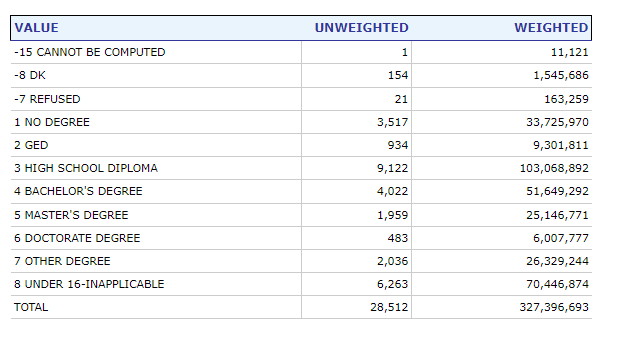

In [25]:
df_edu_median = df_edu_median[df_edu_median["highest_education"] > 0]
df_edu_median.head()

,highest_education,median_income,median_expenditure
3,1.0,9600.0,1039.0
4,2.0,20000.0,1711.5
5,3.0,23858.0,1612.0
6,4.0,48635.5,2118.0
7,5.0,65000.0,2952.0


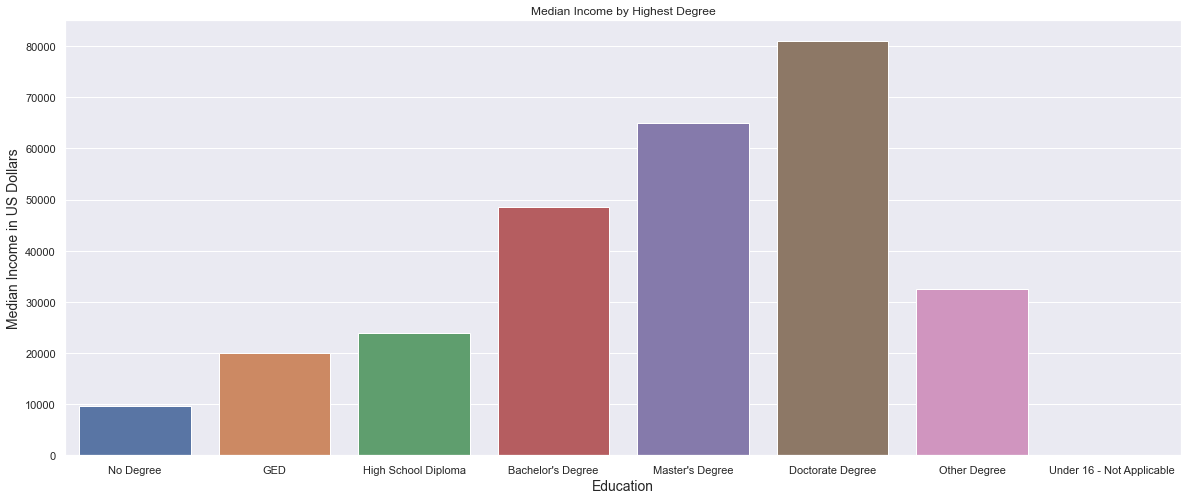

In [26]:
plt.figure(figsize=(20, 8))
fig = sns.barplot(x='highest_education', 
    y='median_income',
    data=df_edu_median,
    ci=None )
plt.ylabel("Median Income in US Dollars", size=14)
plt.xlabel("Education", size=14)
plt.title(label = "Median Income by Highest Degree")
fig.set_xticklabels(labels = ["No Degree", 'GED', "High School Diploma", "Bachelor's Degree", "Master's Degree", "Doctorate Degree", "Other Degree", "Under 16 - Not Applicable"])
plt.show()

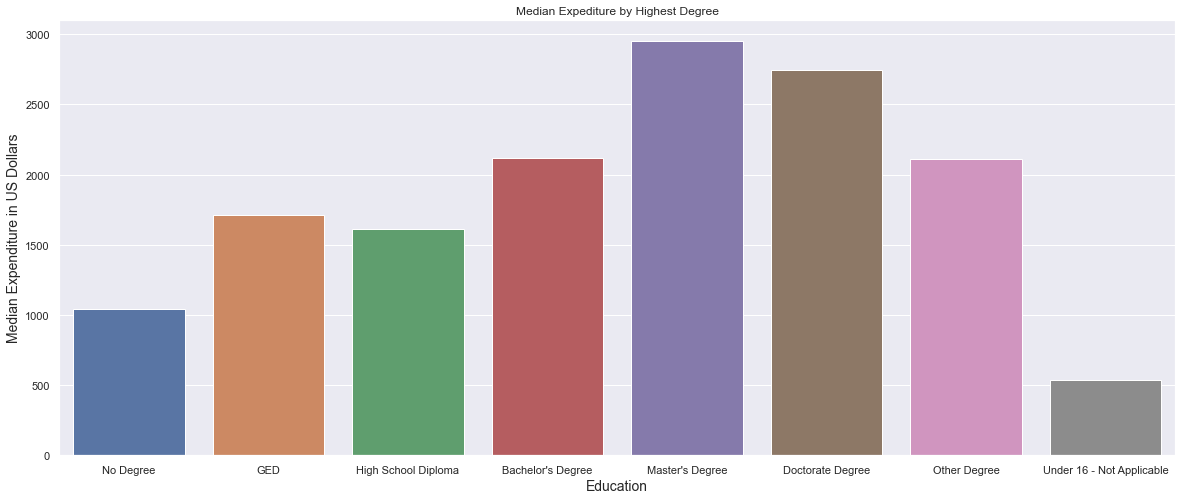

In [27]:
plt.figure(figsize=(20, 8))
fig = sns.barplot(x='highest_education', 
    y='median_expenditure',
    data=df_edu_median,
    ci=None )
plt.ylabel("Median Expenditure in US Dollars", size=14)
plt.xlabel("Education", size=14)
plt.title(label = "Median Expediture by Highest Degree")
fig.set_xticklabels(labels = ["No Degree", 'GED', "High School Diploma", "Bachelor's Degree", "Master's Degree", "Doctorate Degree", "Other Degree", "Under 16 - Not Applicable"])
plt.show()

Interesting finding. Master's Degree holders tend to spend more on healthcare!

## Feature Engineering

Let's try creating some features that could prove useful. We found some significance in the number of visits a participant has so let's make a feature that adds them together.

In [36]:
visit_variables = [name for name in df.columns.values if "num" in name]
foo = lambda row: sum([row[n] for n in visit_variables])
df["number_of_visits"] = df.apply(foo, axis = 1)

In [37]:
df["number_of_visits"].value_counts()

0.0      4996
2.0      4802
4.0      3394
5.0      1568
6.0      1545
         ... 
424.0       1
860.0       1
480.0       1
421.0       1
409.0       1
Name: number_of_visits, Length: 372, dtype: int64

Text(0, 0.5, 'Count')

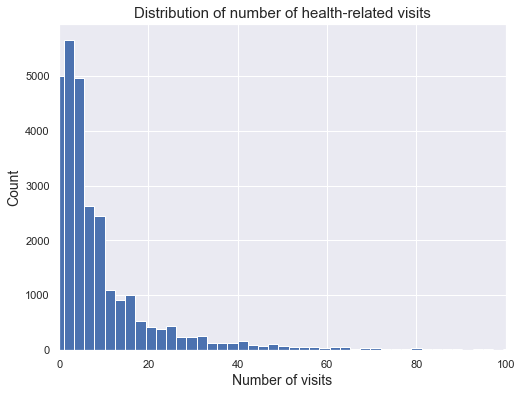

In [54]:
plt.figure(figsize = (8, 6))
fig = plt.hist(df["number_of_visits"], bins = 400)
plt.title("Distribution of number of health-related visits", size = 15)
plt.xlim(0,100)
plt.xlabel("Number of visits", size = 14)
plt.ylabel("Count", size = 14)
plt.show()

Great now we have a feature representing how many visits a participant has. Let's create a similar one for the number of diagnoses a participant has.

In [56]:
diagnoses = ['high_blood_pressure','coronary_heart_disease','angina','heart_attack','other_heart_condition','stroke','emphysema','chronic_bronchitis','high_cholesterol','cancer','diabetes','joint_pain','arthritis','asthma','adhd']
foo = lambda row: sum([row[n] for n in diagnoses if row[n] == 1])
df["diag_amt"] = df.apply(foo, axis = 1)

In [58]:
df["diag_amt"].value_counts()

0.0     11949
1.0      6192
2.0      3840
3.0      2560
4.0      1808
5.0      1075
6.0       572
7.0       292
8.0       131
9.0        53
10.0       23
11.0       14
12.0        3
Name: diag_amt, dtype: int64

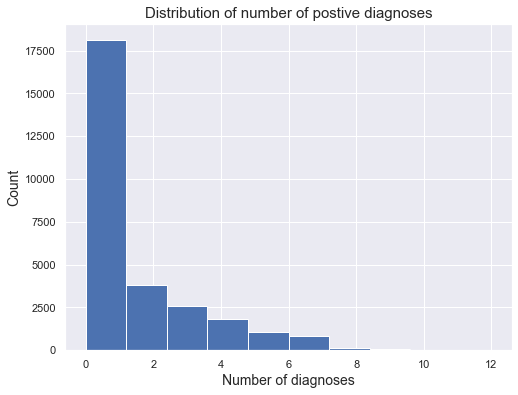

In [60]:
plt.figure(figsize = (8, 6))
plt.hist(df["diag_amt"])
plt.title("Distribution of number of postive diagnoses", size = 15)
plt.xlabel("Number of diagnoses", size = 14)
plt.ylabel("Count", size = 14)
plt.show()